## Important Libraries 

In [1]:
import os 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import sklearn
from sklearn.model_selection import train_test_split , GridSearchCV , learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , mean_squared_error

2025-05-18 18:01:25.371233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747591285.393600     135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747591285.400449     135 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!pip install --upgrade scikit-learn

### Warning

In [3]:
import warnings
warnings.filterwarnings('ignore') 

### Curve Learning training 

In [4]:
def plot_learning_curve_sklearn(estimator, X, y, title="Learning Curve", cv=3):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

### Curve loss 

In [5]:
def plot_loss_curve_generic(model, x_train, y_train, x_test, y_test, epochs=15, title='Loss Curve', is_classification=True):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Fit the model on the training data
        model.fit(x_train, y_train)

        # Predict on training data
        train_pred = model.predict(x_train)
        if is_classification:
            # For classification, use accuracy as the "loss" (or error)
            train_loss = 1 - accuracy_score(y_train, train_pred)
        else:
            # For regression, use mean squared error
            train_loss = mean_squared_error(y_train, train_pred)
        train_losses.append(train_loss)

        # Predict on validation data
        val_pred = model.predict(x_test)
        if is_classification:
            val_loss = 1 - accuracy_score(y_test, val_pred)
        else:
            val_loss = mean_squared_error(y_test, val_pred)
        val_losses.append(val_loss)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

### Function Save all thing 

In [6]:
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def save_full_model_package(model, x_train, y_train, x_test, y_test, model_name):
    """Save model, performance report, confusion matrix, learning curve, and loss curve."""

    # 1. Save the trained model
    joblib.dump(model, f'{model_name}.pkl')

    # 2. Make predictions and calculate evaluation metrics
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # 3. Save evaluation report as JSON
    with open(f'{model_name}_report.json', 'w') as f:
        json.dump({
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm.tolist()
        }, f, indent=4)

    # 4. Save confusion matrix as image
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.close()

    # 5. Save learning curve
    plot_learning_curve_sklearn(model, x_train, y_train, title=model_name, filename=f"{model_name}_learning_curve.png")

    # 6. Save loss curve
    plot_loss_curve_generic(model, x_train, y_train, x_test, y_test, epochs=15,
                            is_classification=True, filename=f"{model_name}_loss_curve.png")

    print(f"[✔] Model '{model_name}' and all related files have been saved.")

# ---- Helper functions ----

def plot_learning_curve_sklearn(estimator, X, y, title="Learning Curve", cv=3, filename=None):
    """Plot and optionally save the learning curve for a given estimator."""
    from sklearn.model_selection import learning_curve
    import numpy as np

    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color='blue')
    plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy", color='red')
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()

    if filename:
        plt.savefig(filename)
    else:
        plt.show()
    plt.close()

def plot_loss_curve_generic(model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True, filename=None):
    """Simulate and plot loss curve for any model (retraining at each epoch)."""
    from sklearn.metrics import accuracy_score, mean_squared_error

    train_losses, val_losses = [], []

    for _ in range(epochs):
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_test)

        if is_classification:
            train_loss = 1 - accuracy_score(y_train, y_train_pred)
            val_loss = 1 - accuracy_score(y_test, y_val_pred)
        else:
            train_loss = mean_squared_error(y_train, y_train_pred)
            val_loss = mean_squared_error(y_test, y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color='blue')
    plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", color='red')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    if filename:
        plt.savefig(filename)
    else:
        plt.show()
    plt.close()

## Load Dataset 

In [7]:
train = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

## Analysis Data 

### Classes

In [8]:
image_classes = os.listdir(train)

In [9]:
image_classes

['Normal', 'Viral Pneumonia', 'Covid']

In [10]:
for i, category in enumerate(image_classes):
        image_path = os.path.join(train, category)
        print ("image_path ------->  ",image_path)
    
        images_in_folder = os.listdir(image_path)
        print ("images_in_folder ------->  ",images_in_folder)
    
        first_image = images_in_folder[0]
        print ("images_in_folder[0] ------->  ",images_in_folder[0])
    
        first_image_path = image_path + '/' + first_image
        print ("first_image_path ------->  ",first_image_path)
    
        img = image.load_img(first_image_path)
        print (img)

image_path ------->   /kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal
images_in_folder ------->   ['071.jpeg', '014.jpeg', '073.jpeg', '05.jpeg', '023.jpeg', '01.jpeg', '096.jpeg', '060.jpeg', '063.jpeg', '059.jpeg', '087.jpeg', '064.jpeg', '011.jpeg', '068.jpeg', '058.jpeg', '020.jpeg', '050.jpeg', '03.jpeg', '02.jpeg', '093.jpeg', '016.jpeg', '010.jpeg', '018.jpeg', '067.jpeg', '088.jpeg', '054.jpeg', '052.jpeg', '084.jpeg', '04.jpeg', '066.jpeg', '079.jpeg', '077.jpeg', '082.jpeg', '056.jpeg', '094.jpeg', '080.jpeg', '057.jpeg', '019.jpeg', '021.jpeg', '074.jpeg', '061.jpeg', '08.jpeg', '069.jpeg', '062.jpeg', '06.jpeg', '013.jpeg', '051.jpeg', '097.jpeg', '024.jpeg', '015.jpeg', '012.jpeg', '081.jpeg', '095.jpeg', '072.jpeg', '092.jpeg', '055.jpeg', '086.jpeg', '053.jpeg', '025.jpeg', '022.jpeg', '017.jpeg', '065.jpeg', '091.jpeg', '076.jpeg', '07.jpeg', '083.jpeg', '075.jpeg', '070.jpeg', '09.jpeg', '085.jpeg']
images_in_folder[0] ------->   071.jpeg
first_image_p

### Show Sample from Classes

In [11]:
def plot_images(image_classes):
    plt.figure(figsize = (14,14))
    
    for i, category in enumerate(image_classes):
        image_path = train + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

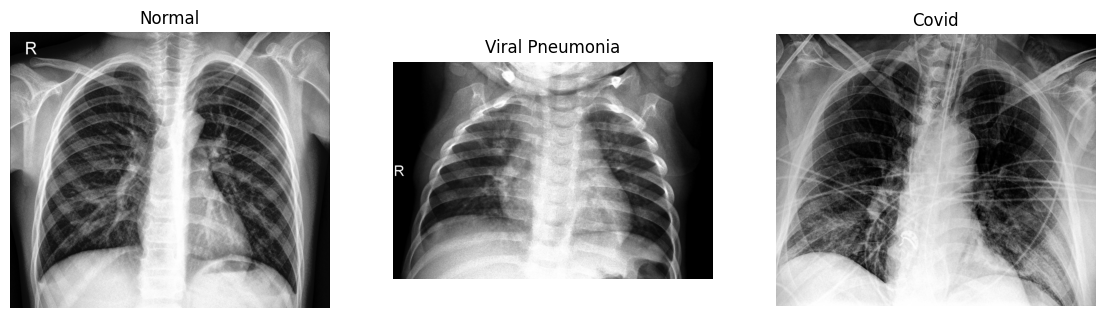

In [12]:
plot_images(image_classes)

## Data Preprocessing 

In [13]:
def load_images_from_directory(base_path, image_size=(64, 64)):
    X = []
    y = []
    class_names = os.listdir(base_path)

    for class_name in class_names:
        class_path = os.path.join(base_path, class_name)
        for img_file in os.listdir(class_path)[:500]:  
            try:
                img_path = os.path.join(class_path, img_file)
                img = load_img(img_path, target_size=image_size, color_mode='grayscale')
                img_array = img_to_array(img).flatten() / 255.0
                X.append(img_array)
                y.append(class_name)
            except:
                continue

    return np.array(X), np.array(y)

In [14]:
x_train, y_train = load_images_from_directory(train)
x_test, y_test = load_images_from_directory(test)

###

In [15]:
label_map = {'Normal': 0, 'Viral Pneumonia': 1, 'Covid': 2}
inverse_label_map = {v: k for k, v in label_map.items()}

In [16]:
y_train = [label_map[label] for label in y_train]
y_test = [label_map[label] for label in y_test]

## Machine Learning Models

### Logistic Regression

In [17]:
log_model = LogisticRegression(max_iter=1000)

In [18]:
log_model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred_log = log_model.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.81      0.85      0.83        20
           2       0.93      0.96      0.94        26

    accuracy                           0.88        66
   macro avg       0.87      0.87      0.87        66
weighted avg       0.88      0.88      0.88        66



<Axes: >

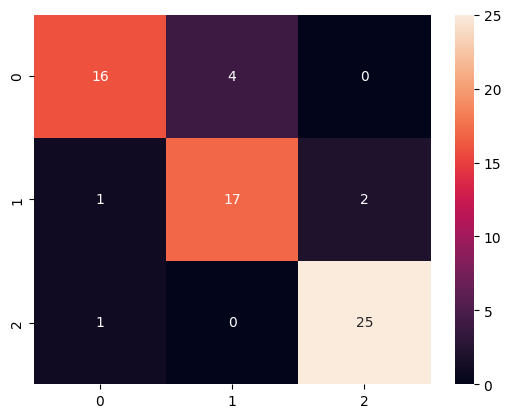

In [21]:
matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matrix, annot=True, fmt='d', cbar=True)

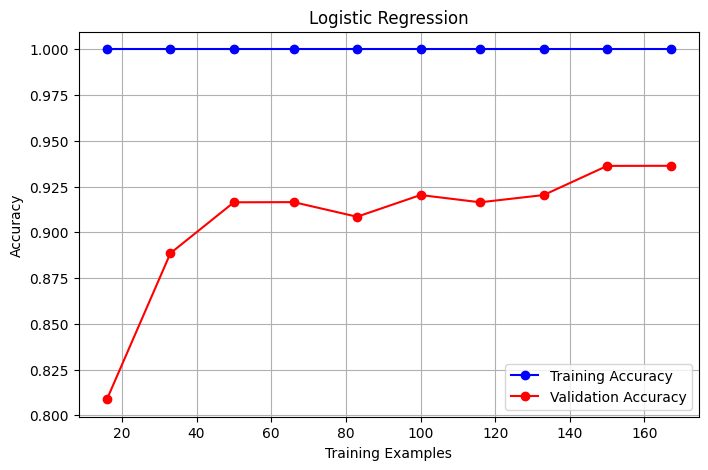

In [22]:
plot_learning_curve_sklearn(log_model, x_train, y_train, title="Logistic Regression")

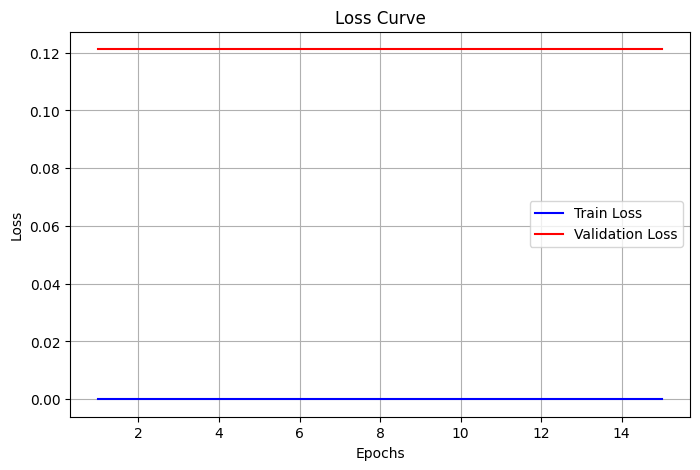

In [23]:
plot_loss_curve_generic(log_model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [24]:
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8788


### SVM

In [25]:
svm = SVC()
param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [26]:
svm_grid = GridSearchCV(svm, param_grid,n_jobs=-1)

In [27]:
svm_grid.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 500, 1000]})

In [28]:
svm_grid.best_estimator_

SVC(C=0.1, kernel='poly', max_iter=500)

In [29]:
y_pred_grid_svm = svm_grid.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred_grid_svm))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.85      0.87        20
           2       0.92      0.92      0.92        26

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



<Axes: >

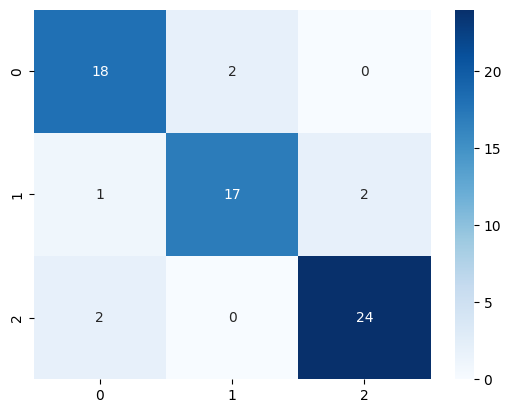

In [31]:
matrix = confusion_matrix(y_test, y_pred_grid_svm)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',cbar=True)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data wit

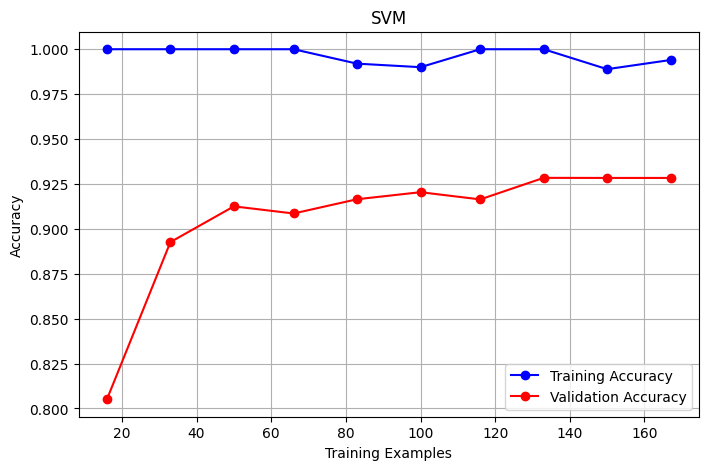

In [32]:
plot_learning_curve_sklearn(svm_grid, x_train, y_train, title="SVM")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

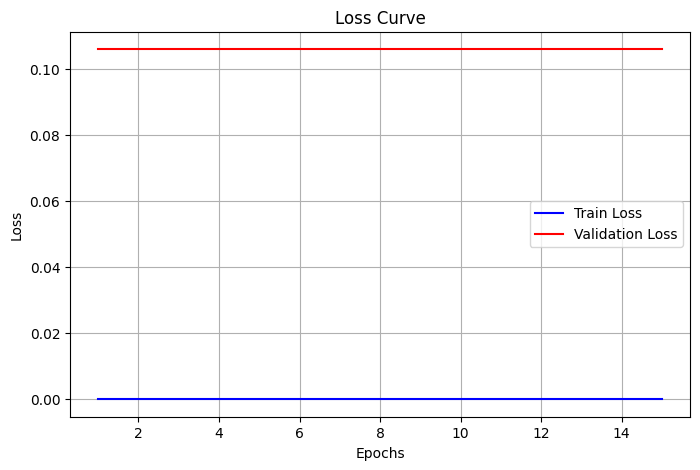

In [33]:
plot_loss_curve_generic(svm_grid, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [34]:
accuracy = accuracy_score(y_test, y_pred_grid_svm)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8939


### Decision Tree

In [35]:
tree1 = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 15, 20 , 25 , 30 , 35],
}

In [36]:
grid_tree_model = GridSearchCV(tree1,params)

In [37]:
grid_tree_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35]})

In [38]:
grid_tree_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [39]:
y_pred_tree = grid_tree_model.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.85      0.85      0.85        20
           2       1.00      1.00      1.00        26

    accuracy                           0.91        66
   macro avg       0.90      0.90      0.90        66
weighted avg       0.91      0.91      0.91        66



<Axes: >

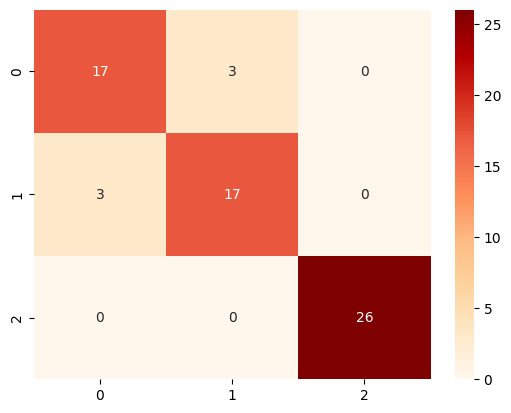

In [41]:
matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


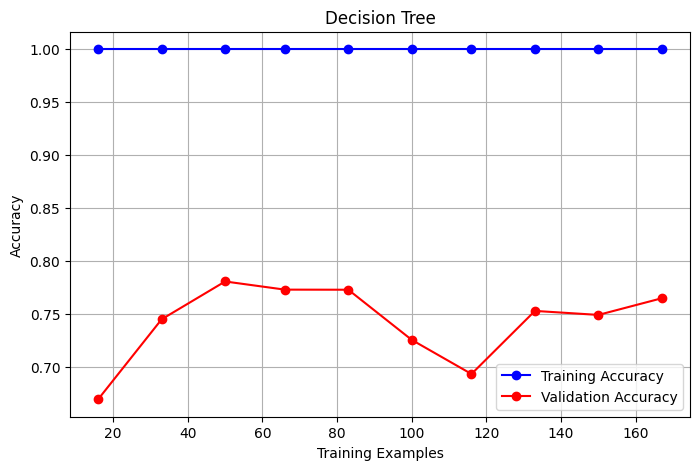

In [42]:
plot_learning_curve_sklearn(grid_tree_model, x_train, y_train, title="Decision Tree")

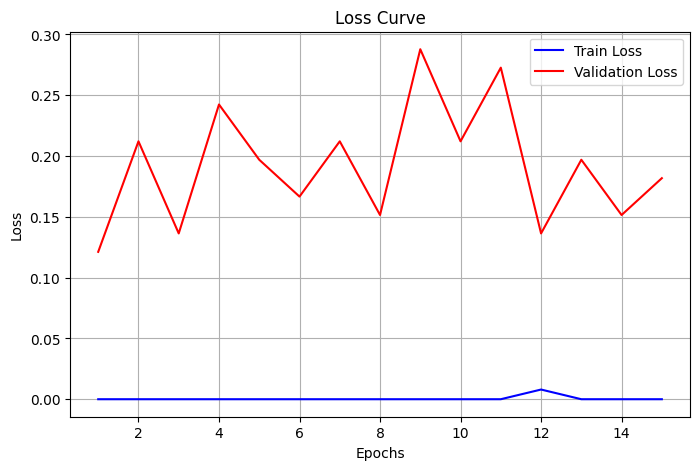

In [43]:
plot_loss_curve_generic(grid_tree_model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [44]:
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9091


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

In [46]:
rf_grid_model = GridSearchCV(rf_model , param_grid)

In [47]:
rf_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [48]:
y_pred_rf = rf_grid_model.predict(x_test)

In [49]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.62      0.80      0.70        20
           2       0.96      0.92      0.94        26

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.79      0.77      0.77        66



<Axes: >

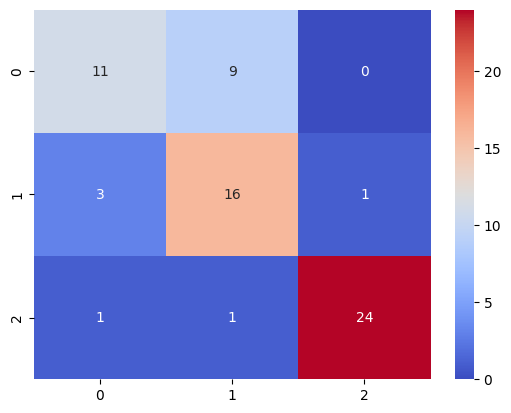

In [50]:
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, fmt='d',cmap='coolwarm',cbar=True)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


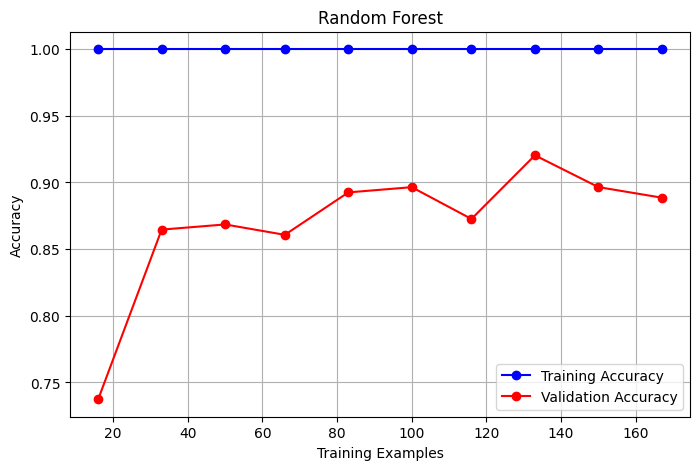

In [51]:
plot_learning_curve_sklearn(rf_grid_model, x_train, y_train, title="Random Forest")

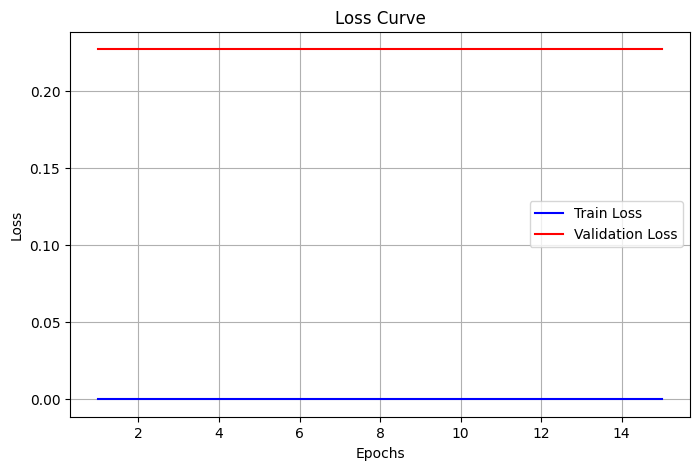

In [52]:
plot_loss_curve_generic(rf_grid_model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [53]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7727


### KNN

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred_knn = knn_model.predict(x_test)

In [57]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.57      0.80      0.67        20
           2       0.92      0.88      0.90        26

    accuracy                           0.73        66
   macro avg       0.73      0.71      0.70        66
weighted avg       0.75      0.73      0.72        66



<Axes: >

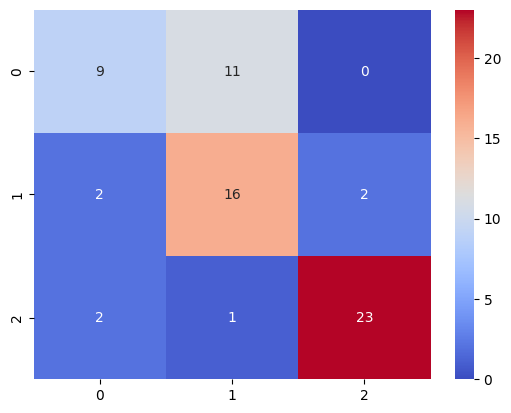

In [58]:
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt='d',cmap='coolwarm',cbar=True)

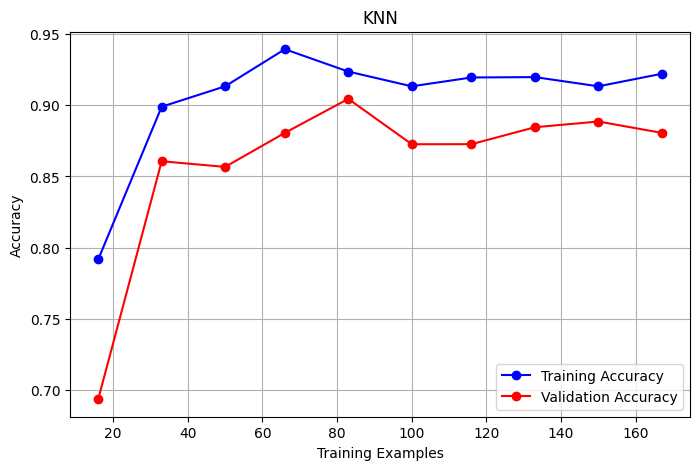

In [59]:
plot_learning_curve_sklearn(knn_model, x_train, y_train, title="KNN")

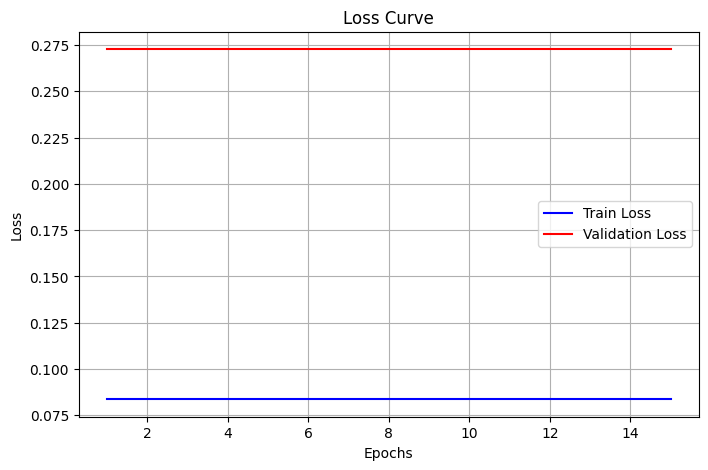

In [60]:
plot_loss_curve_generic(knn_model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [61]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7273


### Naive Bayse 

In [62]:
nb_model = GaussianNB()

In [63]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred_nb = nb_model.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.61      0.70      0.65        20
           2       0.89      0.92      0.91        26

    accuracy                           0.74        66
   macro avg       0.73      0.72      0.72        66
weighted avg       0.74      0.74      0.74        66



<Axes: >

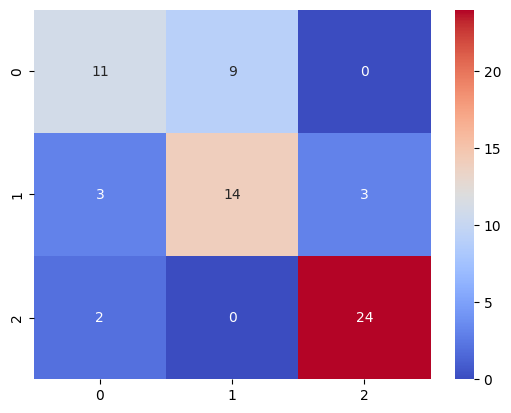

In [66]:
matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix, annot=True, fmt='d',cmap='coolwarm',cbar=True)

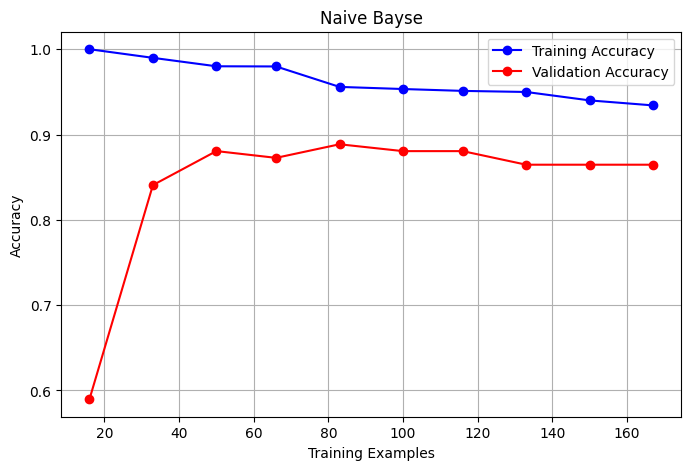

In [67]:
plot_learning_curve_sklearn(nb_model, x_train, y_train, title="Naive Bayse")

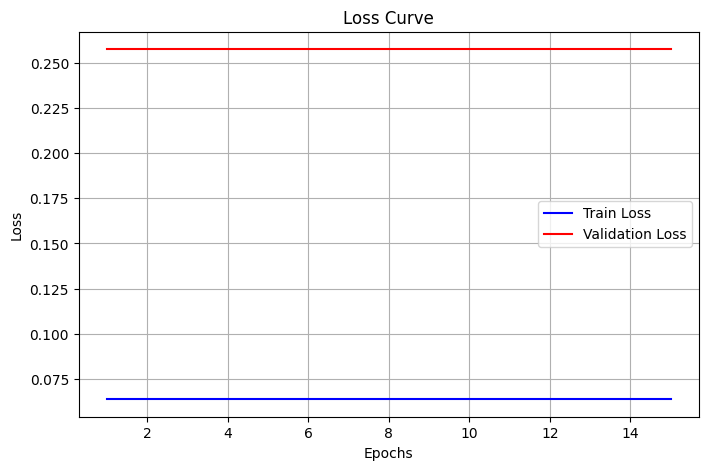

In [68]:
plot_loss_curve_generic(nb_model, x_train, y_train, x_test, y_test, epochs=15, is_classification=True)

In [69]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7424


### Delete Output in Kaggle 

In [70]:
#!rm -rf /kaggle/working/*

### Save Models

In [71]:
import joblib

# Assuming you have a trained model called `log_model`
joblib.dump(log_model, 'logistic_regression.pkl')
joblib.dump(svm_grid, 'SVM.pkl')
joblib.dump(grid_tree_model, 'Decision Tree.pkl')
joblib.dump(rf_grid_model, 'Random Forst.pkl')
joblib.dump(knn_model, 'KNN.pkl')
joblib.dump(nb_model, 'Naive Bayse.pkl')

['Naive Bayse.pkl']